# W1M2 - SQL Tutorial

#### 학습 목표
SQL의 기초에 대해서 공부합니다.
Tutorial의 Home에서부터 Operators까지 읽고 Example을 실행합니다.
Jupyter Notebook에서 SQL을 사용해서 데이터를 처리하는 것을 공부합니다.

#### 기능요구사항
Jupyter Notebook을 만듭니다.
SQL Tutorials에서 Example을 하나씩 수행하고 그 결과를 노트북에 출력하세요.
원하는 출력결과를 얻기 위해 필요하다면 적합한 Demo Table을 만들어야 합니다.

#### 프로그래밍 요구사항
sqlite3 라이브러리를 사용하세요

#### pandas와 같은 라이브러리는 사용해서는 안됩니다. SQL 명령어로만 원하는 결과를 얻어야 합니다.

#### 예상결과 및 동작예시
Query의 결과가 출력된 Jupyter notebook을 제출하세요.

#### 팀 활동 요구사항
각자가 이해하기 어려웠던, 또는 이해하지 못한 keyword에 대해서 함께 토의해 봅시다. 그 결과를 개인 위키에 기록하세요.



---

## SQLite Python: Creating a New Database

### Creating an SQLite database file from Python

In [1]:
import sqlite3

# create a new SQLite database
db_file = "/Users/admin/Documents/GitHub/Daily_Softeer/missions/Week1/my.db"  # SQLite DB 파일 경로
conn = sqlite3.connect(db_file)

# close
conn.close()

# with 사용하여 자동으로 닫기 
with sqlite3.connect(db_file) as conn:
    # interact with database
    pass


# Catch error
try:
    with sqlite3.connect(db_file) as conn:
        #interact
        pass
except sqlite3.OperationalError as e:
    print("Failed to open database:", e)

### Program to create a new SQLite database

In [2]:
try:
    with sqlite3.connect(db_file) as conn:
        print(f"Opened SQLite database with version {sqlite3.sqlite_version} succesfully.")

except sqlite3.OperationalError as e:
    print("Failed to open database:", e)

Opened SQLite database with version 3.43.2 succesfully.


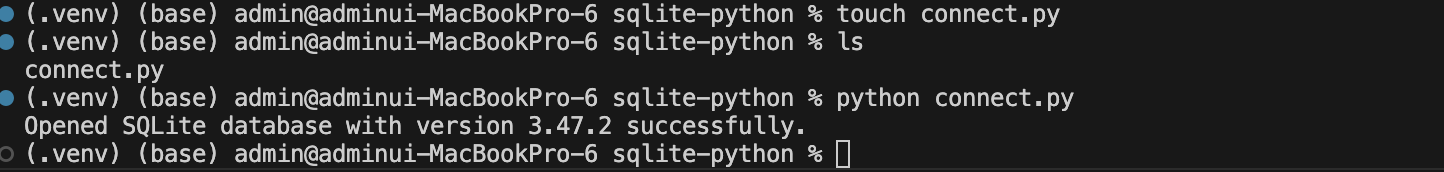

### Creating an SQLite database in the memory
SQLite에서 메모리에 데이터베이스를 생성하려면 sqlite3.connect() 함수에 문자열 ':memory:'를 전달하면 됩니다. 메모리 데이터베이스는 프로그램 실행 동안에만 유지되며, 프로그램이 종료되면 데이터가 사라집니다.

In [ ]:
try:
    with sqlite3.connect(':memory:') as conn:
        # interact
        pass
except sqlite3.OperationalError as e:
    print("Failed to open database:", e)

---

## SQLite Python: Creating Tables

### Creating new tables from Python

In [6]:
import sqlite3

sql_statements = [ 
    """CREATE TABLE IF NOT EXISTS projects (
            id INTEGER PRIMARY KEY, 
            name text NOT NULL, 
            begin_date DATE, 
            end_date DATE
        );""",

    """CREATE TABLE IF NOT EXISTS tasks (
            id INTEGER PRIMARY KEY, 
            name TEXT NOT NULL, 
            priority INT, 
            project_id INT NOT NULL, 
            status_id INT NOT NULL, 
            begin_date DATE NOT NULL, 
            end_date DATE NOT NULL, 
            FOREIGN KEY (project_id) REFERENCES projects (id)
        );"""
]

# create a database connection
try:
    with sqlite3.connect('my.db') as conn:
        # create a cursor
        cursor = conn.cursor()

        # execute statements
        for statement in sql_statements:
            cursor.execute(statement)

        # commit the changes
        conn.commit()

        print("Tables created successfully.")
except sqlite3.OperationalError as e:
    print("Failed to create tables:", e)


Tables created successfully.


![스크린샷 2025-01-03 오후 2.31.45.png](<attachment:스크린샷 2025-01-03 오후 2.31.45.png>)
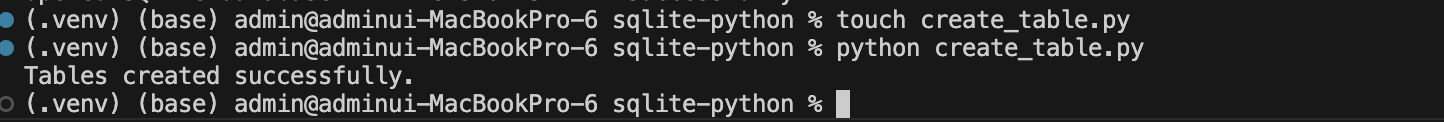

---

### SQLite Python: Inserting Data

#### Inserting a new row into a table from Python


In [7]:
import sqlite3

def create_tables(conn):
    cur = conn.cursor()
    cur.execute('''
        CREATE TABLE IF NOT EXISTS projects (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT NOT NULL,
            begin_date TEXT,
            end_date TEXT
        )
    ''')
    cur.execute('''
        CREATE TABLE IF NOT EXISTS tasks (
            id INTEGER PRIMARY KEY AUTOINCREMENT,
            name TEXT NOT NULL,
            priority INTEGER,
            status_id INTEGER NOT NULL,
            project_id INTEGER NOT NULL,
            begin_date TEXT NOT NULL,
            end_date TEXT NOT NULL,
            FOREIGN KEY (project_id) REFERENCES projects (id)
        )
    ''')
    conn.commit()

def add_project(conn, project):
    # insert table statement
    sql = ''' INSERT INTO projects(name,begin_date,end_date)
              VALUES(?,?,?) '''
    
    # Create  a cursor
    cur = conn.cursor()

    # execute the INSERT statement
    cur.execute(sql, project)

    # commit the changes
    conn.commit()

    # get the id of the last inserted row
    return cur.lastrowid


def add_task(conn, task):
    # insert table statement
    sql = '''INSERT INTO tasks(name,priority,status_id,project_id,begin_date,end_date)
             VALUES(?,?,?,?,?,?) '''
    
    # create a cursor
    cur = conn.cursor()

    # execute the INSERT statement
    cur.execute(sql, task)

    # commit the changes
    conn.commit()

    # get the id of the last inserted row
    return cur.lastrowid


def main():
    try:
        with sqlite3.connect('my.sql') as conn:
            create_tables(conn)
            # add  a project
            project = ('Cool App with SQLite & Python', '2015-01-01', '2015-01-30')
            project_id = add_project(conn, project)
            print(f'Created a project with the id {project_id}')

            # add tasks to the project 
            tasks = [
                ('Analyze the requirements of the app', 1, 1, project_id, '2015-01-01', '2015-01-02'),
                ('Confirm with user about the top requirements', 1, 1, project_id, '2015-01-03', '2015-01-05')
            ]

            for task in tasks:
                task_id = add_task(conn, task)
                print(f'Created task with the id {task_id}')


    except sqlite3.Error as e:
        print(e)

if __name__ == '__main__':
    main()

Created a project with the id 1
Created task with the id 1
Created task with the id 2


#### Updating data in SQLite using Python 

In [10]:
import sqlite3

sql = 'UPDATE tasks SET priority = ? WHERE id = ?'

try:
    with sqlite3.connect('my.db') as conn:
        cursor = conn.cursor()
        cursor.execute(sql, (2,1) )
        conn.commit()
except sqlite3.OperationalError as e:
    print(e)

no such table: tasks


#### SQLite Python: Querying Data

In [11]:
import sqlite3

def get_task_by_id(id: int) -> tuple:
    try:
        with sqlite3.connect('my.db') as conn:
            cur = conn.cursor()
            cur.execute('select id, name, priority from tasks where id =?', (id,))
            row = cur.fetchone()
            return row, None
    except sqlite3.OperationalError as e:
        return None, e      

if __name__ == '__main__':
    task, error = get_task_by_id(1)
    if error is not None:
        print(f'Error: {error}')
    else:
        print(task)

Error: no such table: tasks


**요약**  
•	fetchall(): 모든 결과 반환 (리스트 형태, 각 행은 튜플).  
•	fetchone(): 다음 한 행만 반환 (튜플 형태).  
•	fetchmany(size): 지정된 size 개수의 행 반환.  

### SQLite Python: Deleting Data

In [12]:
import sqlite3

sql = 'DELETE FROM tasks WHERE id = ?'

try:
    with sqlite3.connect('my.db') as conn:
        cur = conn.cursor()
        cur.execute(sql, (1,))
        conn.commit()
except sqlite3.OperationalError as e:
    print(e)

no such table: tasks
